In [1]:
import scipy.io
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/all_faults.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=512
stride=450

X=[]
Y=[]


for k in df['fault'].unique():

    df_temp_2 = df[df['fault']==k]

    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])

X=np.array(X)
X=X.reshape((X.shape[0],-1,1))
#X = np.repeat(X, 3, axis=3) # To repeat into 3 chanel format


Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [11]:
X.shape

(6172, 512, 1)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)


In [13]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Conv1D,MaxPooling1D



# from tensorflow.keras.models import load_model
# cnn_model = load_model(r'H:\Gear Fault\Trained Model\CNN_model_gear.h5')



no_classes = len(df['fault'].unique())

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=100, activation='relu', input_shape=(X.shape[1],X.shape[2])))
cnn_model.add(Conv1D(filters=32, kernel_size=50, activation='relu'))

cnn_model.add(MaxPooling1D(pool_size=4))
cnn_model.add(Flatten())
cnn_model.add(Dense(100, activation='relu'))


cnn_model.add(Dense(no_classes, activation='softmax'))

cnn_model.summary()

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 413, 64)             │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 364, 32)             │         102,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 91, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2912)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         291,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 14)                  │           1,414 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 401,610 (1.53 MB)

 Trainable params: 401,610 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
batch_size =300
epochs = 10
history = cnn_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.2188 - loss: 2.2524 - val_accuracy: 0.4168 - val_loss: 1.5214
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.5123 - loss: 1.3226 - val_accuracy: 0.6609 - val_loss: 0.9449
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7473 - loss: 0.7854 - val_accuracy: 0.8240 - val_loss: 0.5481
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8483 - loss: 0.5118 - val_accuracy: 0.8785 - val_loss: 0.3334
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9067 - loss: 0.2529 - val_accuracy: 0.9131 - val_loss: 0.2302
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.9022 - loss: 0.3035 - val_accuracy: 0.8963 - val_loss: 0.2721
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9112 - loss: 0.3132 - val_accuracy: 0.9060 - val_loss: 0.3270
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9357 - loss: 0.1975 - val_accuracy: 0.9503 - val_loss:

58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step


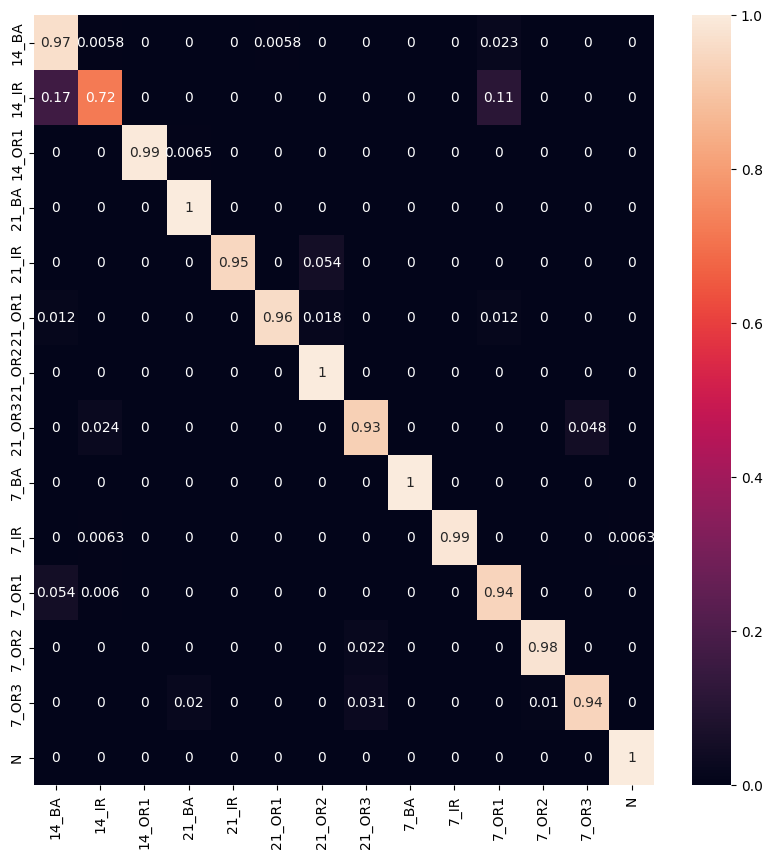

In [15]:
def inv_Transform_result(y_pred):
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred



y_pred=cnn_model.predict(X_test)


Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10,10))
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()

In [16]:
dummy_cnn = Model(inputs=cnn_model.layers[0].input,outputs=cnn_model.layers[5].output)
y_viz = dummy_cnn.predict(X_train)

135/135 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4320 samples in 0.009s...
[t-SNE] Computed neighbors for 4320 samples in 0.217s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4320
[t-SNE] Computed conditional probabilities for sample 2000 / 4320
[t-SNE] Computed conditional probabilities for sample 3000 / 4320
[t-SNE] Computed conditional probabilities for sample 4000 / 4320
[t-SNE] Computed conditional probabilities for sample 4320 / 4320
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.582561
[t-SNE] KL divergence after 300 iterations: 1.204882


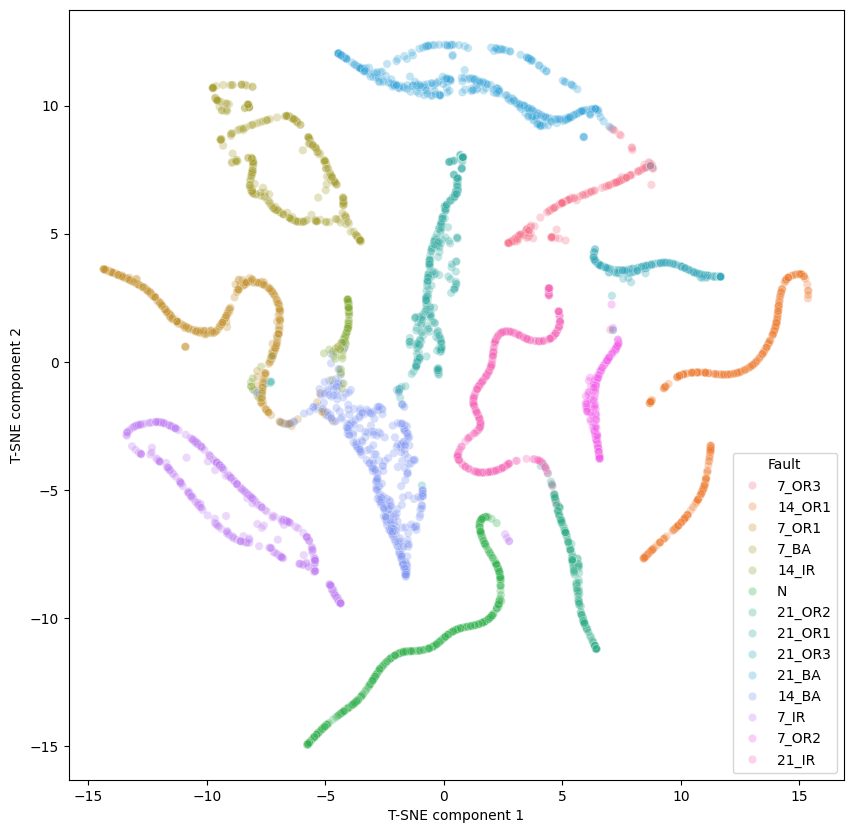

In [17]:
from sklearn.manifold import TSNE

X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['T-SNE component 1', 'T-SNE component 2'])

tSNEdf['Fault']=inv_Transform_result(y_train)


# Plot the PC-1 and PC-2
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=tSNEdf['T-SNE component 1'],y=tSNEdf['T-SNE component 2'],hue='Fault',
    data=tSNEdf,
    legend="full",
    alpha=0.3)
plt.show()